In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
medical_charges_url = 'medical.csv'

In [3]:
medical_df = pd.read_csv('medical.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age'
                   )
fig.update_layout(bargap = 0.1)
fig.show()

In [10]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

In [11]:
fig = px.histogram(medical_df,
                   x = 'charges', 
                   marginal= 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title= 'Annual medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df,
                   x = 'sex', 
                   marginal= 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title= 'Annual medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df,
                   x = 'region', 
                   marginal= 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title= 'Annual medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [14]:
fig = px.histogram(medical_df,
                   x='charges', 
                   color='smoker',
                   facet_row='sex',  # Facet by sex (rows)
                   facet_col='region',  # Facet by region (columns)
                   marginal='box',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges by Sex, Region, and Smoking Status')

fig.update_layout(bargap=0.1)
fig.show()

In [15]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
px.histogram(medical_df, x = 'smoker', color = 'sex', title= 'smoker')

In [17]:
px.histogram(medical_df, x = 'smoker', color = 'region', title= 'region')

In [18]:
px.histogram(medical_df, x = 'smoker', color = 'children', title= 'childern')

In [19]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex', 'bmi','children'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [20]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [21]:
px.violin(medical_df, x = 'children', y='charges')

In [22]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [23]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [24]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [25]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [26]:
medical_df.charges.corr(smoker_numeric)


np.float64(0.7872514304984778)

In [27]:
sex_values = {'female': 0, 'male':1}
sex_numeric = medical_df.sex.map(sex_values)
medical_df.charges.corr(sex_numeric)

np.float64(0.05729206220202533)

In [28]:
num_df = medical_df[['age', 'bmi', 'children', 'charges']]
num_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


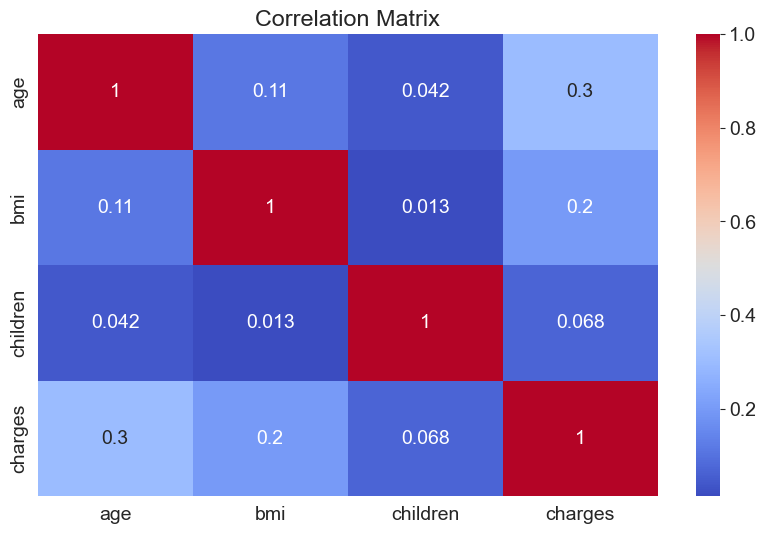

In [29]:
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix');

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [33]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


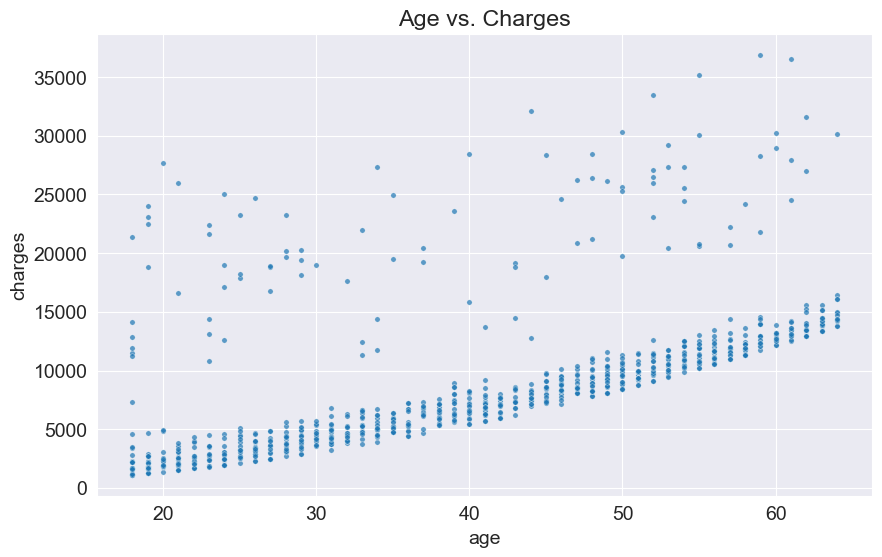

In [34]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x = 'age', y='charges', alpha = 0.7, s=15);

In [35]:
def estimate_charges(age, w , b):
    return w * age + b 

In [36]:
w = 50
b = 100

In [40]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)


,age
1,1000
2,1500
3,1750
4,1700
5,1650
6,2400
7,1950
8,1950
9,3100
10,1350


In [43]:
non_smoker_df.charges.head(10)

1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
Name: charges, dtype: float64

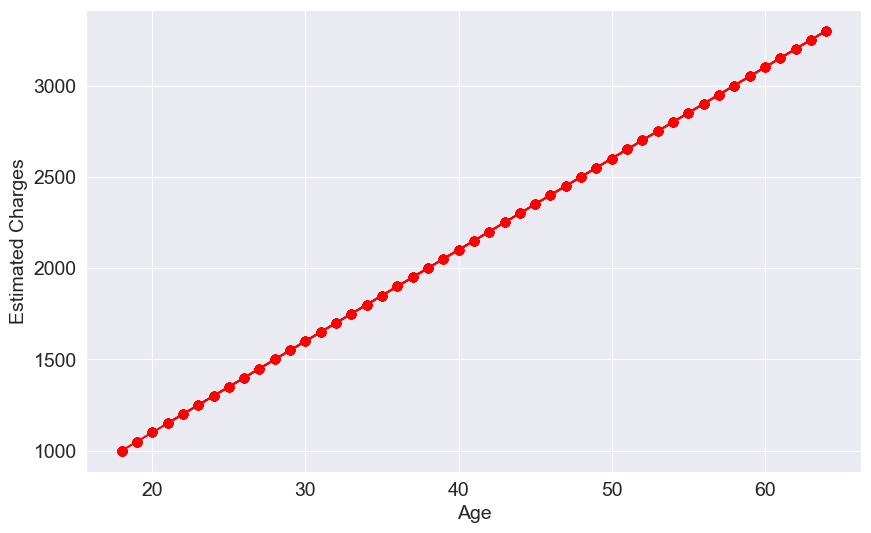

In [45]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

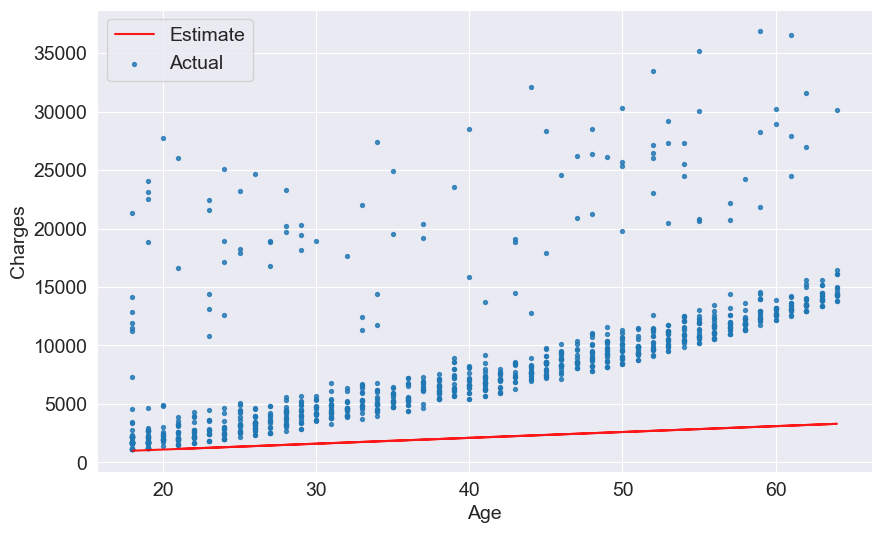

In [50]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9);
plt.scatter(ages, target, s = 8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate', 'Actual ']);

In [51]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w , b)
    
    plt.plot(ages, estimated_charges, 'r', alpha = 0.9);
    plt.scatter(ages, target, s = 8 , alpha= 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimator', 'Actual ']);

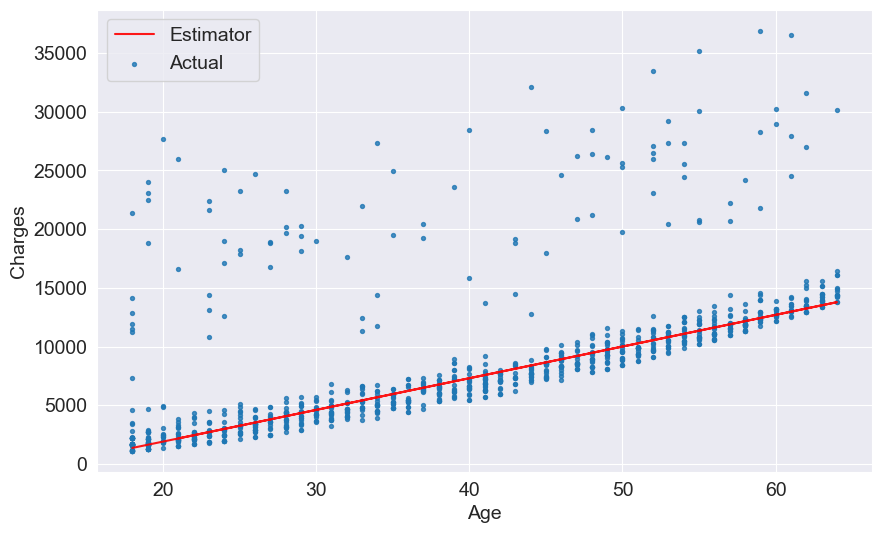

In [124]:
try_parameters(270,-3500)

In [125]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [127]:
targets = non_smoker_df['charges']
predicted = estimated_charges


In [128]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [129]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w ,b)
   
    
    plt.plot(ages, predictions, 'r', alpha = 0.9);
    plt.scatter(ages, target, s = 8 , alpha= 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['prediction', 'Actual ']);
    
    loss = rmse(target, predictions)
    print('RMSE Loss', loss)
    

RMSE Loss 4663.743689821927


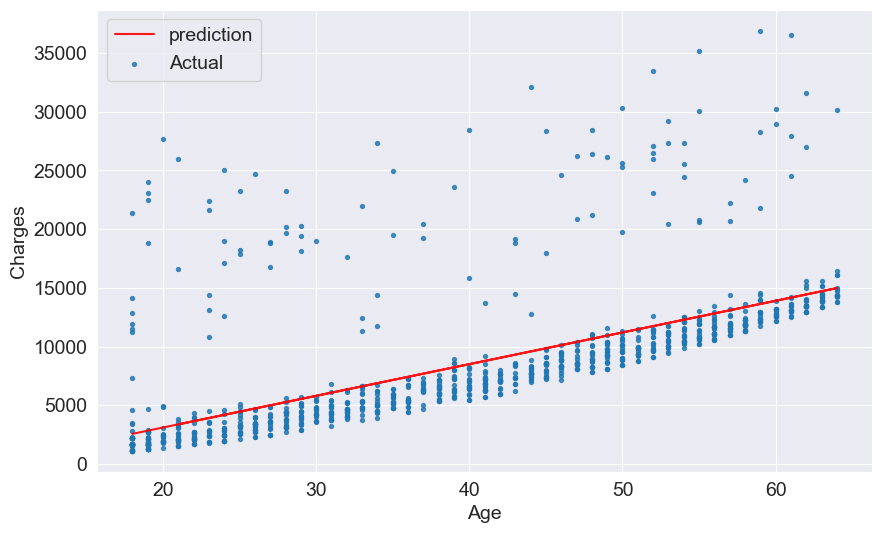

In [179]:
try_parameters(270, -2300)